# All Chart

In [177]:
from matplotlib import pyplot as plt
import pickle
import os
import pandas as pd
import seaborn as sns
wd = os.getcwd()

In [130]:
data_train = pd.read_csv(wd+'\\01. data\\input\\data_train.csv')
data_train['nhom_no_cic'] = data_train['nhom_no_cic'].astype('str')

data_test = pd.read_csv(wd+'\\01. data\\output\\out_put_risk_logistic.csv')
data_test['nhom_no_cic'] = data_test['nhom_no_cic'].astype('str')
excluded_columns = data_train.columns[13:]
input_columns = [col for col in data_train.columns if col not in excluded_columns]
input_columns.extend(['nhom_no_cic'])


## Feature Importance

### NFI

In [131]:
xgboost_model_nfi = pickle.load(open(wd + '\\04. model\\xgboost_model_nfi.pkl', 'rb'))
feature_importance = xgboost_model_nfi.feature_importances_
importance_dict = dict(zip(input_columns, feature_importance))
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=False)
sorted_importance

[('income_tier', 0.0),
 ('gender', 0.0),
 ('province_city', 0.0),
 ('campaign_group', 0.0021380219),
 ('product_group', 0.0021888546),
 ('marital_status', 0.0069340155),
 ('bi_card_type', 0.008552635),
 ('liab_limit', 0.009295698),
 ('nhom_no_cic', 0.014302422),
 ('cus_class', 0.029379237),
 ('cus_income', 0.03215486),
 ('edu_level', 0.057341635),
 ('age', 0.07414844),
 ('contract_limit', 0.11446403)]

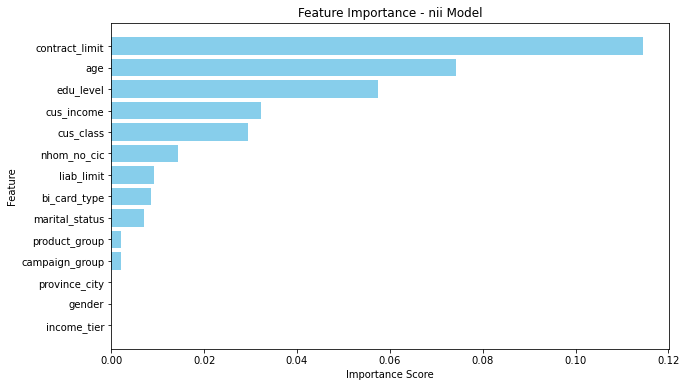

In [132]:
# Tách dữ liệu thành tên biến và độ quan trọng
feature_names, importance_scores = zip(*sorted_importance)

# Vẽ biểu đồ độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importance_scores, align='center', color='skyblue')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance - nii Model')
plt.show()

### NII

In [133]:
xgboost_model_nii = pickle.load(open(wd + '\\04. model\\xgboost_model_nii.pkl', 'rb'))
feature_importance = xgboost_model_nii.feature_importances_
importance_dict = dict(zip(input_columns, feature_importance))
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=False)
sorted_importance

[('province_city', 0.0),
 ('income_tier', 0.0020055538),
 ('nhom_no_cic', 0.002376292),
 ('campaign_group', 0.0024487197),
 ('contract_limit', 0.0037397544),
 ('cus_income', 0.0067577963),
 ('gender', 0.00692207),
 ('cus_class', 0.00738471),
 ('product_group', 0.0077074547),
 ('edu_level', 0.008357829),
 ('bi_card_type', 0.00844066),
 ('marital_status', 0.009248581),
 ('age', 0.013135943),
 ('liab_limit', 0.0134411855)]

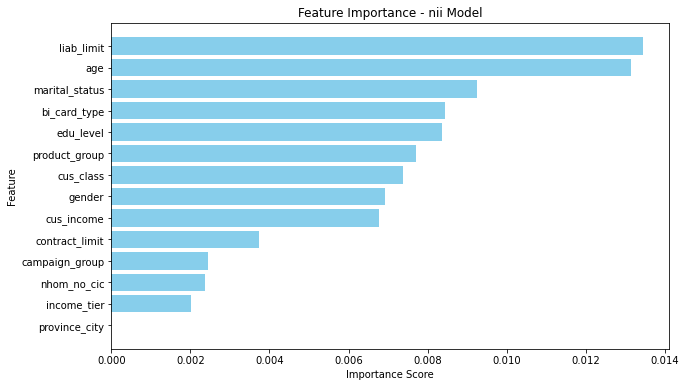

In [134]:

# Tách dữ liệu thành tên biến và độ quan trọng
feature_names, importance_scores = zip(*sorted_importance)

# Vẽ biểu đồ độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importance_scores, align='center', color='skyblue')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance - nii Model')
plt.show()

## Risk vs Income

In [135]:
out_put_link = wd + '\\01. data\\output\\out_put_profit_xgb.csv' 
data_final = pd.read_csv(out_put_link)
plt_data = data_final[['nfi_24m', 'nfi_pred', 'nii_24m', 'nii_pred', 'prob_of_risk_event']]

In [136]:
plt_data['prob_of_risk_event'] = round(plt_data['prob_of_risk_event'], 2)
plt_data = plt_data.dropna()

C:\Users\ngamt2\AppData\Local\Temp\ipykernel_19908\277893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_data['prob_of_risk_event'] = round(plt_data['prob_of_risk_event'], 2)


In [137]:
plt_data.columns

Index(['nfi_24m', 'nfi_pred', 'nii_24m', 'nii_pred', 'prob_of_risk_event'], dtype='object')

### Risk vs NFI

In [138]:
quantiles = plt_data.groupby("prob_of_risk_event")[["nfi_pred", "nfi_24m"]].quantile([0.25, 0.75])
counts = plt_data.groupby("prob_of_risk_event")[["nfi_pred", "nfi_24m"]].count()


# Hiển thị bảng quantiles với cột count
quantiles


nfi_pred       nfi_24m
prob_of_risk_event                               
0.00               0.25   716865.80  3.982000e+03
                   0.75  2557099.80  2.193233e+06
0.01               0.25   886656.60  5.249100e+04
                   0.75  2374799.50  2.360582e+06
0.02               0.25   799157.70  7.187832e+03
...                             ...           ...
0.92               0.75   628794.75 -4.225920e+04
0.93               0.25   484707.24  1.159045e+05
                   0.75   514556.04  3.477135e+05
0.94               0.25   717444.90  0.000000e+00
                   0.75   717444.90  0.000000e+00

[190 rows x 2 columns]

In [139]:
result_df = quantiles.unstack().reset_index()
result_df.columns = ["prob_of_risk_event", "q25_nfi_pred", "q75_nfi_pred","q25_nfi_act", "q75_nfi_act" ]
result_df

# result_df

,prob_of_risk_event,q25_nfi_pred,q75_nfi_pred,q25_nfi_act,q75_nfi_act
0,0.00,716865.8000,2557099.80,3982.0000,2.193233e+06
1,0.01,886656.6000,2374799.50,52491.0000,2.360582e+06
2,0.02,799157.7000,1539069.90,7187.8323,1.755500e+06
3,0.03,793695.2625,1149940.25,6261.7500,1.637600e+06
4,0.04,429814.9300,1542098.95,0.0000,2.048221e+06
...,...,...,...,...,...
90,0.90,422124.9700,1104654.00,0.0000,9.717313e+05
91,0.91,394396.2700,709031.52,0.0000,0.000000e+00
92,0.92,628794.7500,628794.75,-42259.1972,-4.225920e+04
93,0.93,484707.2400,514556.04,115904.5100,3.477135e+05


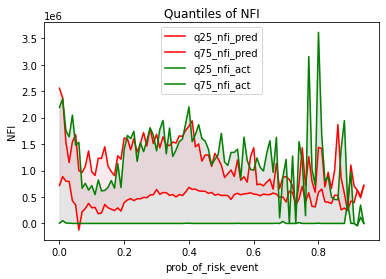

In [140]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ đường
plt.plot(result_df['prob_of_risk_event'], result_df['q25_nfi_pred'], label='q25_nfi_pred', color='red')
plt.plot(result_df['prob_of_risk_event'], result_df['q75_nfi_pred'], label='q75_nfi_pred', color='red')

plt.plot(result_df['prob_of_risk_event'], result_df['q25_nfi_act'], label='q25_nfi_act', color='green')
plt.plot(result_df['prob_of_risk_event'], result_df['q75_nfi_act'], label='q75_nfi_act', color='green')


# Đặt nhãn cho trục x và trục y
plt.xlabel('prob_of_risk_event')
plt.ylabel('NFI')

# Đổ màu khu vực giữa hai đường q25 và q75
plt.fill_between(result_df['prob_of_risk_event'], result_df['q25_nfi_pred'], result_df['q75_nfi_pred'], color='pink', alpha=0.3)
plt.fill_between(result_df['prob_of_risk_event'], result_df['q25_nfi_act'], result_df['q75_nfi_act'], color='darkgrey', alpha=0.3)

# Đặt tiêu đề cho biểu đồ
plt.title('Quantiles of NFI')

# Hiển thị chú thích
plt.legend()



# Hiển thị biểu đồ
plt.show()

### Risk vs NII

In [141]:
quantiles = plt_data.groupby("prob_of_risk_event")[["nii_pred", "nii_24m"]].quantile([0.25, 0.75])
counts = plt_data.groupby("prob_of_risk_event")[["nii_pred", "nii_24m"]].count()


# Hiển thị bảng quantiles với cột count
quantiles

nii_pred       nii_24m
prob_of_risk_event                               
0.00               0.25   940649.80 -4.958131e+04
                   0.75  2548250.20  1.173249e+06
0.01               0.25  1788762.05 -1.680240e+02
                   0.75  3414561.15  3.946188e+06
0.02               0.25  1991350.80  0.000000e+00
...                             ...           ...
0.92               0.75  3327626.20  1.022016e+06
0.93               0.25  1209234.45 -3.291137e+04
                   0.75  1445529.35  4.492373e+04
0.94               0.25  3393176.20 -2.333000e+05
                   0.75  3393176.20 -2.333000e+05

[190 rows x 2 columns]

In [142]:
result_df = quantiles.unstack().reset_index()
result_df.columns = ["prob_of_risk_event", "q25_nii_pred", "q75_nii_pred","q25_nii_act", "q75_nii_act" ]
result_df

,prob_of_risk_event,q25_nii_pred,q75_nii_pred,q25_nii_act,q75_nii_act
0,0.00,9.406498e+05,2548250.200,-4.958131e+04,1.173249e+06
1,0.01,1.788762e+06,3414561.150,-1.680240e+02,3.946188e+06
2,0.02,1.991351e+06,3846575.800,0.000000e+00,5.917590e+06
3,0.03,1.910554e+06,4306567.125,0.000000e+00,6.526418e+06
4,0.04,3.859640e+05,4181635.675,0.000000e+00,6.716228e+06
...,...,...,...,...,...
90,0.90,1.523254e+06,5308908.500,0.000000e+00,2.467559e+06
91,0.91,1.011104e+06,3856221.450,-4.790765e+05,8.208532e+05
92,0.92,3.327626e+06,3327626.200,1.022016e+06,1.022016e+06
93,0.93,1.209234e+06,1445529.350,-3.291137e+04,4.492373e+04


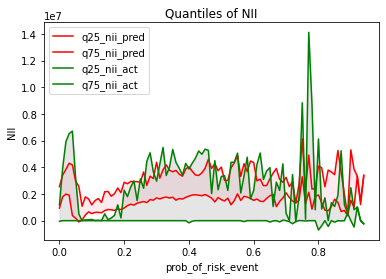

In [143]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ đường
plt.plot(result_df['prob_of_risk_event'], result_df['q25_nii_pred'], label='q25_nii_pred', color='red')
plt.plot(result_df['prob_of_risk_event'], result_df['q75_nii_pred'], label='q75_nii_pred', color='red')

plt.plot(result_df['prob_of_risk_event'], result_df['q25_nii_act'], label='q25_nii_act', color='green')
plt.plot(result_df['prob_of_risk_event'], result_df['q75_nii_act'], label='q75_nii_act', color='green')


# Đặt nhãn cho trục x và trục y
plt.xlabel('prob_of_risk_event')
plt.ylabel('NII')

# Đổ màu khu vực giữa hai đường q25 và q75
plt.fill_between(result_df['prob_of_risk_event'], result_df['q25_nii_pred'], result_df['q75_nii_pred'], color='pink', alpha=0.3)
plt.fill_between(result_df['prob_of_risk_event'], result_df['q25_nii_act'], result_df['q75_nii_act'], color='darkgrey', alpha=0.3)

# Đặt tiêu đề cho biểu đồ
plt.title('Quantiles of NII')

# Hiển thị chú thích
plt.legend()



# Hiển thị biểu đồ
plt.show()

## Counterfactual

In [144]:
data_final.columns

Index(['product_group', 'contract_limit', 'bi_card_type', 'liab_limit',
       'campaign_group', 'cus_income', 'income_tier', 'gender',
       'marital_status', 'edu_level', 'province_city', 'age', 'cus_class',
       'ovd_days', 'ovd_days_6m', 'ovd_days_12m', 'ovd_days_24m',
       'ovd_days_36m', 'nhom_no_cic', 'revolver_group', 'nii_24m', 'nfi_24m',
       'toi_24m', 'provision_24m', 'bad_flag', 'prob_of_risk_event', 'Score',
       'nii_pred', 'nfi_pred'],
      dtype='object')

In [165]:
def top_x_prc(data, col, thres):
    n = int(thres/100*len(data))
    top_x_percent = data.nlargest(n, col)
    return(top_x_percent)


def counter_summary(data_final, prof_col, risk_col):
    columns = ['thres', 'risk_port_by_profit', 'risk_port_by_risk', 'n_cus']
    df = pd.DataFrame(columns=columns)
    for thres in range(0, 101):
        top_df_by_profit = top_x_prc(data_final, prof_col, 100-thres)
        top_df_by_risk = top_x_prc(data_final, risk_col, 100-thres)

        risk_profit=top_df_by_profit['bad_flag'].mean()
        risk_risk=top_df_by_risk['bad_flag'].mean()
        n_cus=top_df_by_profit.shape[0]
        data = pd.Series([thres, risk_profit, risk_risk, n_cus], index=columns)
        df = df.append(data, ignore_index=True)
    return(df)

In [166]:
df_counter = counter_summary(data_final, 'nii_pred', 'Score')

C:\Users\ngamt2\AppData\Local\Temp\ipykernel_19908\451697338.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\ngamt2\AppData\Local\Temp\ipykernel_19908\451697338.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\ngamt2\AppData\Local\Temp\ipykernel_19908\451697338.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\ngamt2\AppData\Local\Temp\ipykernel_19908\451697338.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\ngamt2\AppData\Loca

In [158]:
df_counter

,thres,risk_port_by_profit,risk_port_by_risk,n_cus
0,1.0,0.051392,0.002141,467.0
1,2.0,0.058824,0.00107,935.0
2,3.0,0.067712,0.000713,1403.0
3,4.0,0.067344,0.000534,1871.0
4,5.0,0.067978,0.000855,2339.0
...,...,...,...,...
95,96.0,0.06592,0.046062,44918.0
96,97.0,0.065439,0.050037,45386.0
97,98.0,0.064836,0.053779,45854.0
98,99.0,0.064311,0.058655,46322.0


Text(0.5, 1.0, 'Realized risky event rate counterfactual')

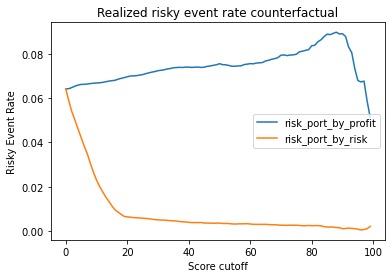

In [176]:

# for i, cus_group in enumerate(segments):
#     ax = axes[i]
#     segment_data = data[data['segment'] == segment_value]
#     ax.scatter(segment_data['x'], segment_data['y'])
#     ax.set_title('Segment: {}'.format(segment_value))
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')


thres = df_counter['thres']
risk_port_by_profit = df_counter['risk_port_by_profit']
risk_port_by_risk = df_counter['risk_port_by_risk']

# Vẽ biểu đồ
plt.plot(thres, risk_port_by_profit, label='risk_port_by_profit')
plt.plot(thres, risk_port_by_risk, label='risk_port_by_risk')

plt.xlabel('Score cutoff')
plt.ylabel('Risky Event Rate')

plt.legend(loc='right')
# Đặt tiêu đề cho biểu đồ
plt.title('Realized risky event rate counterfactual')

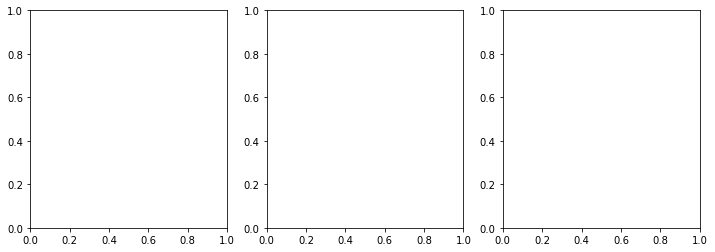

In [186]:
num_segments = len(data_final['revolver_group'].unique())
fig, axes = plt.subplots(nrows=1, ncols=num_segments, figsize=(12, 4))



In [187]:
axes

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)